In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Remove_pvl0')

types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [3]:
!cd

c:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao\Remove_pvl0


In [4]:
feature_no = {}

for celltype in types:
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    with open(f'./{celltype}/{celltype}_opt_lambda.txt', 'r') as f:
        opt_lmbd = float(f.read())
        print(opt_lmbd)
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = log_lambda_range.index(log_opt_lmbd)
    # print(idx)

    feature_no_celltype = int(tuning['Feature_number'][idx])
    # print(feature_no_celltype)
    feature_no[celltype] = feature_no_celltype


B
0.0014677992676220707
CD4_T
0.014677992676220709
CD8_T
0.0021544346900318864
DC
0.06812920690579614
Mono
0.004641588833612781
NK
0.0021544346900318864
other
0.06812920690579614
other_T
0.046415888336127815


In [17]:
feature_no

{'B': 17,
 'CD4_T': 1789,
 'CD8_T': 24,
 'DC': 0,
 'Mono': 23,
 'NK': 32,
 'other': 0,
 'other_T': 0}

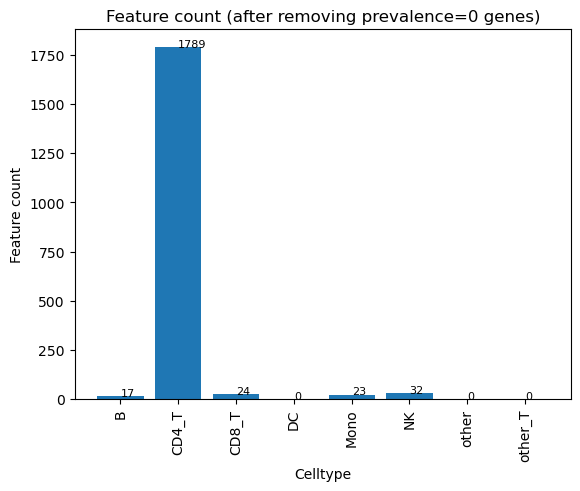

In [20]:
# plt.bar(feature_no_df['Celltype'], feature_no_df['Features'])
plt.bar(feature_no.keys(), feature_no.values())

# Add the values to each bar
for i, v in feature_no.items():
    plt.text(i, v, str(v), fontsize=8)

# Set the x-axis label
plt.xlabel('Celltype')
plt.xticks(rotation=90)

# Set the y-axis label
plt.ylabel('Feature count')

plt.title('Feature count (after removing prevalence=0 genes)')
# Show the plot
plt.show()